# Proyecto final Machine Learning

## Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_validate

from tempfile import mkdtemp
from scipy.stats import loguniform, uniform

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from umap.umap_ import UMAP

d:\UDeusto\S1\Machine Learning\proyecto-machine-learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [5]:
# Ver el total de columnas del DataFrame
pd.set_option('display.max_columns', None)

## Información del dataframe

Este conjunto de datos proporciona información sobre 100.000 personas, incluyendo datos demográficos, nivel socioeconómico, estado de salud, estilo de vida, planes de seguro y gastos médicos.

Está diseñado para apoyar tareas de aprendizaje automático y modelado estadístico, tales como:

- Predicción de costos médicos anuales (regresión)

- Clasificación de individuos según su nivel de riesgo

- Agrupamiento basado en perfiles de salud y seguro

- Análisis de relaciones entre datos demográficos, factores de salud y costos

El conjunto de datos puede ser útil para la predicción de costos de seguros, la evaluación de riesgos, el análisis de reclamaciones y proyectos de análisis de datos sanitarios.

Tomado de: https://www.kaggle.com/datasets/mohankrishnathalla/medical-insurance-cost-prediction?resource=download

In [22]:
df = pd.read_csv('medical_insurance.csv')

In [23]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [24]:
len(df)

100000

In [25]:
len(df.columns)

54

## Requisitos de tareas y recolección de datos

- Tenemos un **dataframe con 100.000 registros y 54 variables** entre numéricas y categóricas.  
  (Cumple con el requisito de ≥ 5.000 registros y ≥ 10 variables).

- El dataframe proviene de un **contexto profesional realista**, pues simula información de pacientes y seguros, perfecta para problemas de salud y predicción de riesgos.

- **Tarea de regresión**:  
  Podemos predecir sobre:
  - `annual_medical_cost` *
  - `annual_premium`
  - `monthly_premium`


- **Tarea de clasificación**:  
  Usar como variable objetivo:
  - `is_high_risk` : (0/1, riesgo médico alto)
  - `had_major_procedure` : probabilidad de cirugía mayor 
  - o crear una variable categórica derivada de los costos médicos (por ejemplo, “alto/bajo costo”).  
 

- **Tarea No supervisado (2)**:  
    - **Clustering**: agrupar pacientes según características de salud o costos (`age`, `bmi`, `smoker`, `income`, etc.).
    - **PCA / t-SNE**: visualizar perfiles o reducir dimensionalidad.
    - **Detección de anomalías**: identificar pacientes con gastos anómalos.

## Calidad del dato

### Integridad

In [26]:
total_cells = df.shape[0] * df.shape[1]
missing_values = df.isna().sum().sum()

Integridad_KPI = 100 * (1 - missing_values/total_cells)
print(f'KPI Integridad : {Integridad_KPI: .2f}%')

missing_by_col = 100 * df.isna().sum() / df.shape[0]
dict_integridad_col = missing_by_col.to_dict()
for k, v in dict_integridad_col.items():
    if v != 0 : 
        print(k, v)

KPI Integridad :  99.44%
alcohol_freq 30.083


### Consistencia

In [27]:
#Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cat_scores = []
for col in categorical_cols:
    col_lower = col.lower()
    if col_lower == 'sex':
        valid = set(['Female', 'Male', 'Other'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'region':
        valid = set(['North', 'Central', 'West', 'South', 'East'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'urban_rural':
        valid = set(['Suburban', 'Urban', 'Rural'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'education':
        valid = set(['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'marital_status':
        valid = set(['Married', 'Single', 'Divorced', 'Widowed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'employment_status':
        valid = set(['Retired', 'Employed', 'Self-employed', 'Unemployed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'smoker':
        valid = set(['Never', 'Current', 'Former'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'alcohol_freq':
        valid = set(['None', 'Weekly', 'Daily', 'Occasional'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'plan_type':
        valid = set(['PPO', 'POS', 'HMO', 'EPO'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'network_tier':
        valid = set(['Bronze', 'Gold', 'Platinum', 'Silver'])
        score = 100 * df[col].isin(valid).mean()
    else:
        #Para el resto solo se comprueba que no sea nula
        score = 100 * (1 - df[col].isnull().mean())
    cat_scores.append(score)

num_scores = []
for col in numeric_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    score = 100 * (1 - coerced.isnull().mean())
    num_scores.append(score)

if len(categorical_cols) + len(numeric_cols) > 0:
    Consistencia_KPI = (sum(cat_scores) + sum(num_scores)) / (len(cat_scores) + len(num_scores))
else:
    Consistencia_KPI = 100.0

print(f"\nConsistencia (KPI): {Consistencia_KPI:.2f} %")


Consistencia (KPI): 99.44 %


### Validez

Como no conocemos los valores tipicos de la mayoria de nuestras columnas solo vamos a mirar el describe y los min-max que propone y ver si algo nos parece sorprendente.

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


### Unicidad

In [29]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

Unicidad_KPI = 100* (1- duplicated_rows/total_rows)
print(f'KPI Unicidad : {Unicidad_KPI}%')

KPI Unicidad : 100.0%


### Precisión

In [30]:
precision_scores = []


for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower, upper = col_mean - 3 * col_std, col_mean + 3 * col_std
    in_range = df[col].between(lower, upper, inclusive='both')
    score = 100 * in_range.mean()
    precision_scores.append(score)

if len(precision_scores) > 0:
    Precision_KPI = sum(precision_scores) / len(precision_scores)
else:
    Precision_KPI = 100.0

print(f"\nPrecisión (KPI proxy): {Precision_KPI:.2f} %")


Precisión (KPI proxy): 98.26 %


### Gráficos

In [31]:
kpis = {
    'Integridad': Integridad_KPI,
    'Consistencia': Consistencia_KPI,
    'Unicidad': Unicidad_KPI,
    'Precisión': Precision_KPI
}

def kpi_color(value):
    if value < 50:
        return 'red'
    elif value < 80:
        return 'orange'
    else:
        return 'green'

fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type':'indicator'}]*4]
)

for idx, (name, value) in enumerate(kpis.items()):
    fig.add_trace(go.Indicator(
    mode='gauge+number',
    value=value,
    title={'text': name, 'font': {'size': 16}},
    gauge={
        'axis': {'range':[0,100]},
        'bar': {'color': kpi_color(value)},
        'steps': [
            {'range':[0,50],'color':'lightcoral'},
            {'range':[50,80],'color':'khaki'},
            {'range':[80,100],'color':'lightgreen'}
        ],
    },
    number={'suffix':' %', 'font':{'size':26}, 'valueformat':'.2f'}  # <-- aquí
), row=1, col=idx+1)


fig.update_layout(
    title={'text':'Dashboard de Calidad de Datos','x':0.5,'font':{'size':22}},
    height=300, width=1000, margin=dict(t=80, b=20)
)

fig.show()

## Analisis exploratorio

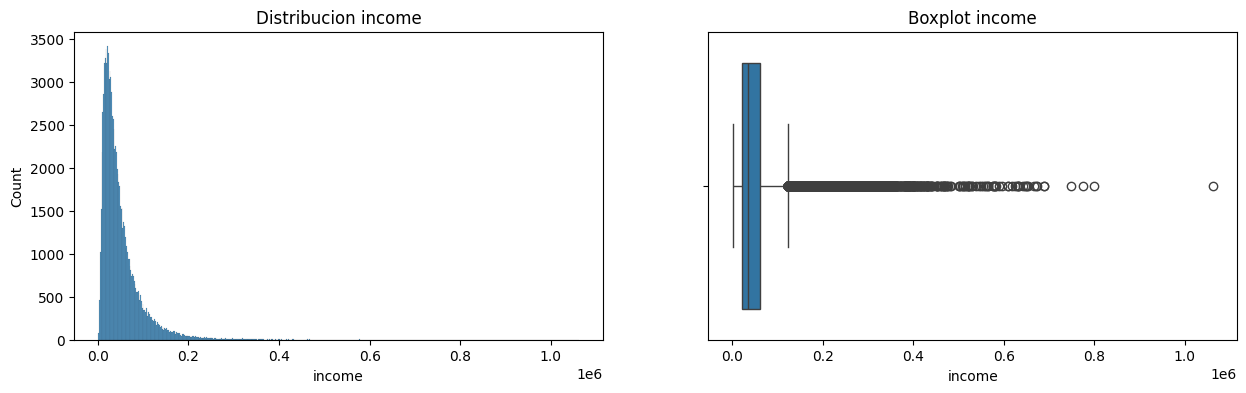

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df['income'], ax=ax[0])
ax[0].set_title("Distribucion income")
sns.boxplot(df['income'], orient='y', ax=ax[1])
ax[1].set_title("Boxplot income")
plt.show()


income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0) / total_claims_paid (des 0)

Text(0.5, 1.0, 'Distribucion total claims paid')

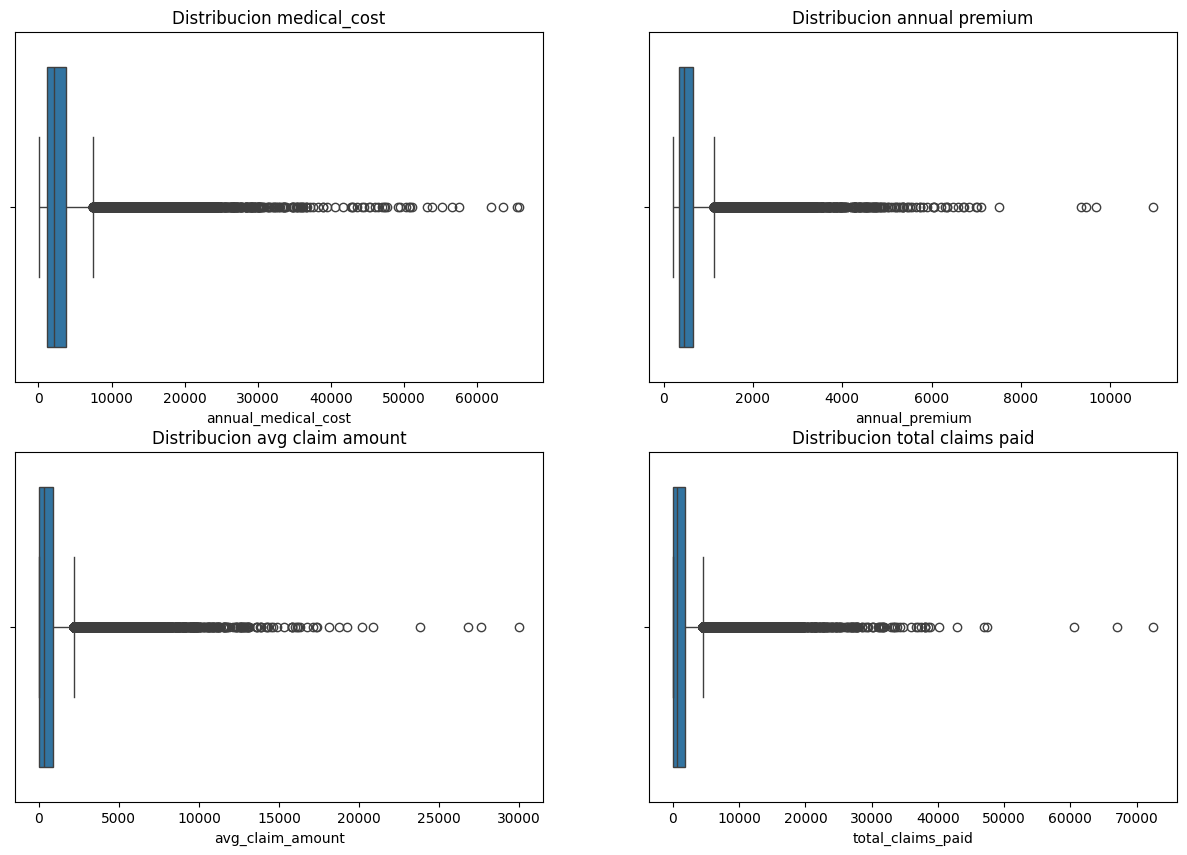

In [33]:
list_money= ["annual_medical_cost","annual_premium", "avg_claim_amount", "total_claims_paid" ]

fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(df['annual_medical_cost'], orient='y', ax=ax[0,0])
ax[0,0].set_title("Distribucion medical_cost")

sns.boxplot(df['annual_premium'], orient='y',ax=ax[0,1])
ax[0,1].set_title("Distribucion annual premium")

sns.boxplot(df['avg_claim_amount'],orient='y', ax=ax[1,0])
ax[1,0].set_title("Distribucion avg claim amount")

sns.boxplot(df['total_claims_paid'], orient='y',ax=ax[1,1])
ax[1,1].set_title("Distribucion total claims paid")


Se puede ver que todas las columnas que describen un monto tienen una distribucion sesgada hasta la derecha con outliers potentes. Entonces nos pareceria relevante hacer un log sobre los valores. Tendremos que tener en cuenta que 'avg_claim_amount' y 'total_claims_paid' tienen valores nulas cuando les tratamos.

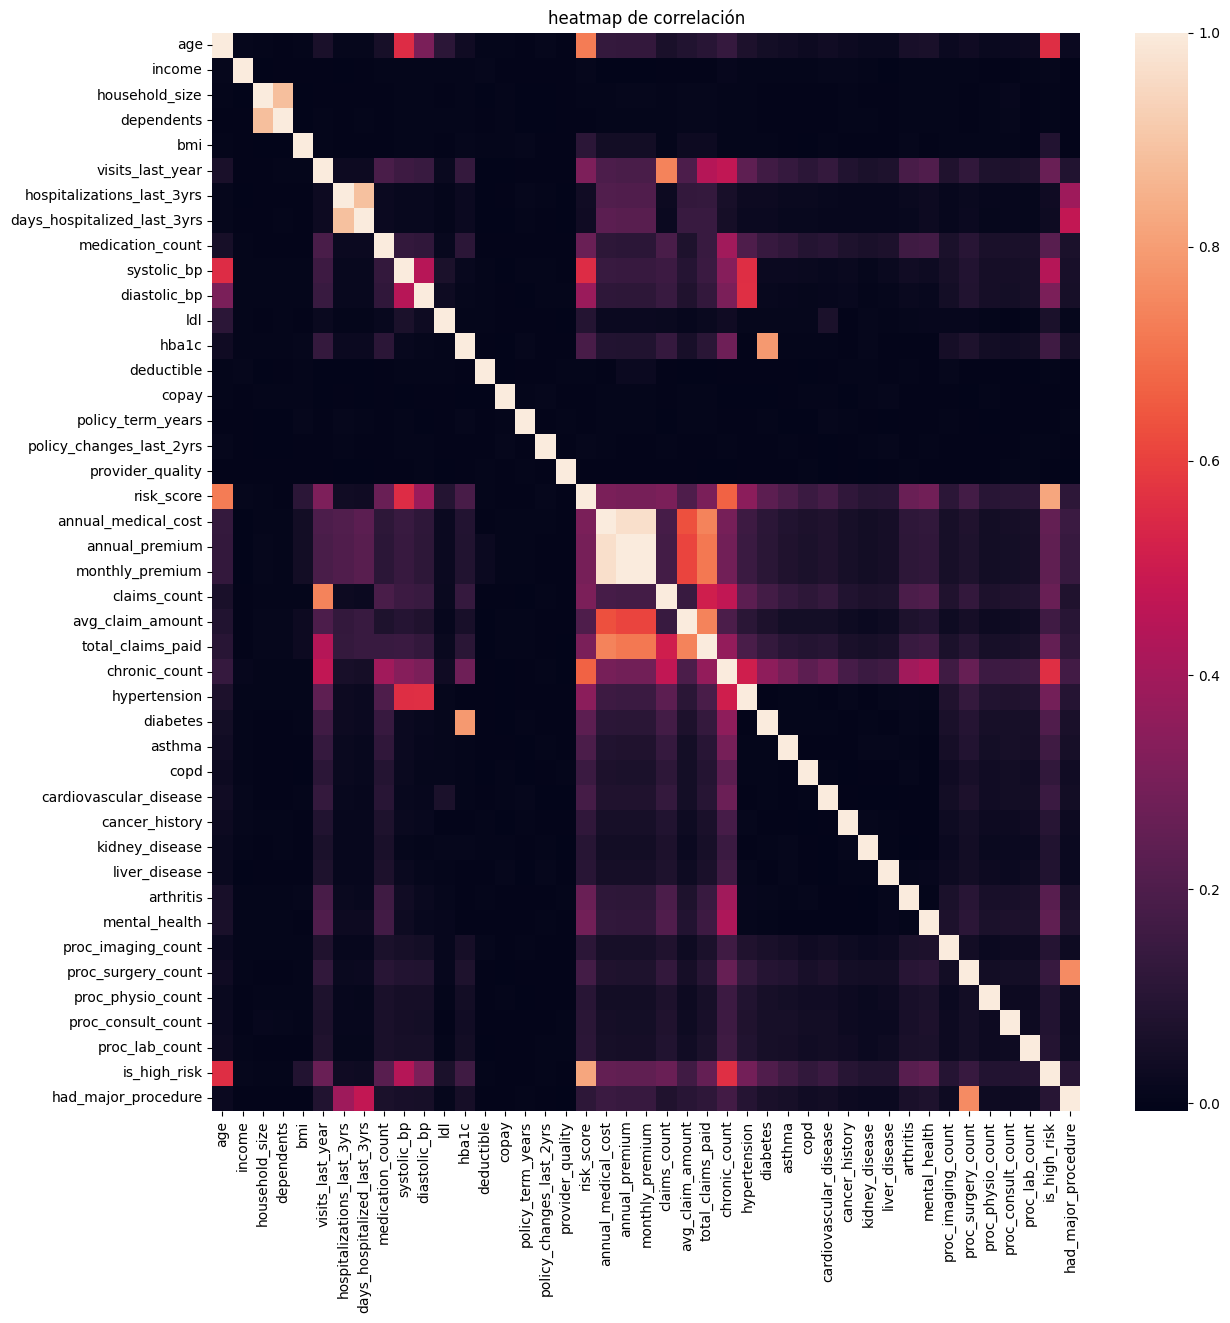

In [34]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(0)
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, fmt=".2f", ax=ax)
ax.set_title("heatmap de correlación")
plt.show()

Con esa matriz de correlacion podemos ver que no tenemos muchas columnas que son altamente correlacionadas, lo que significa que no tenemos muchas posibilidades de simplemente suprimir algunas columnas.

<Axes: xlabel='monthly_premium', ylabel='annual_premium'>

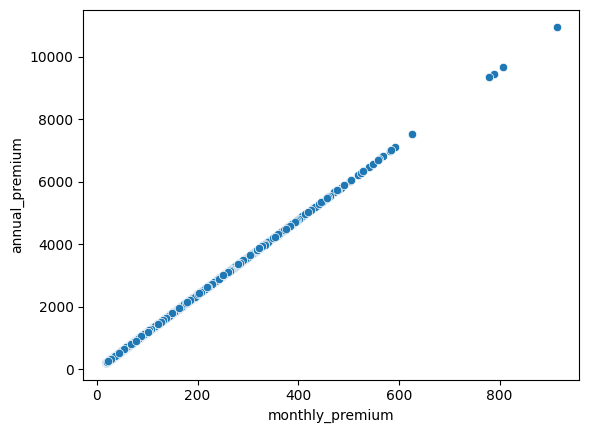

In [35]:
sns.scatterplot(df, x='monthly_premium', y='annual_premium')

Aqui la correlacion perfecta entre monthly premium y annual_premium se confirma sin ningun desviacion.
Solo eliminaremos el 'monthly_premium' que es exactament 'annual_premium' / 12

<Axes: xlabel='age', ylabel='risk_score'>

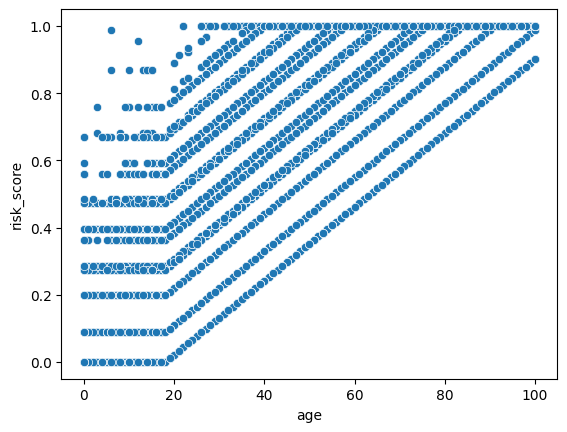

In [36]:
sns.scatterplot(df, x='age', y='risk_score')

## Tratamiento

Primeramente suprimimos la columna de monthly_premium ya que tenemos la a nivel anual que nos da la informacion a escala mas comparable y relevante con las otras columnas similares.

In [37]:
df = df.drop(columns='monthly_premium')

### Faltantes

Al calcular la Integridad habiamos visto en su detalle que estaba la columna de 'alcohol_freq' a la cual faltaba datos. Vamos a hacer un enfoco sobre esta columna.

In [38]:
vals = df['alcohol_freq'].unique().tolist()
missing_percentage = round(100 * float(df['alcohol_freq'].isna().sum() / df.shape[0]),1)

print(f"{vals} son los valores de la columna")
print(f'Los nan representan {missing_percentage}%  de esas')

[nan, 'Weekly', 'Daily', 'Occasional'] son los valores de la columna
Los nan representan 30.1%  de esas


Como podemos ver no hay una opcion para los que no beben alcohol en absoluto. Asi podemos suponer que los nan no viene de datos faltantes sino que de gente que nunca consuma alcohol. Para confirmar eso necesitariamos la proporcion de no-bebedores en los EEUU.  

Despues de una rapida investigacion, nuestra hipotesis parece justa : https://www.cdc.gov/nchs/products/databriefs/db374.htm ya que se expecte un 30% de no bebedores.

Entonces vamos a asignar un valor de 'Never' a los nan de la columna a fin de que sea mas claro que los datos no son faltantes y tienen sentidos.

In [39]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')

In [40]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,Never,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,Never,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,Never,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [41]:
df['alcohol_freq'].unique()

array(['Never', 'Weekly', 'Daily', 'Occasional'], dtype=object)

Vamos a cambiar algunas columnas numericas que nos parecen importante para la segmentacion en numéricas ordenales. Asi el algoritmo de PCA podra tomarles en cuenta.

In [42]:
map_education = {'No HS':0, 'HS':1, 'Some College':2, "Bachelors":3, 'Masters':4, 'Doctorate':5}
map_smoker = {'Never' : 0, 'Former' : 2, 'Current' : 4}
map_alcohol = {'Never' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily': 3}

In [43]:
df['education'] = df['education'].map(lambda x: map_education[x])
df['smoker'] = df['smoker'].map(lambda x: map_smoker[x])
df['alcohol_freq'] = df['alcohol_freq'].map(lambda x: map_alcohol[x])

### Outliers


En la parte de exploracion hemos visto que las columnas represantantes de montos de dinero tienen una distribucion con un sesgo a la derecha y un monton de outliers. Como vamos a escalar posterioramente y que para nuestro clustering intentaramos trabajor con K-Means, vamos a aplicar un logaritmo.  
Como tenemos dos de esas columnas que contienen valores de 0, utilizamos el log(x+1) y no el log basico.

In [44]:

# income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0)
df['log_income'] = df['income'].map(lambda x: np.log(x + 1))
df['log_annual_medical_cost'] = df['annual_medical_cost'].map(lambda x: np.log(x + 1))
df['log_annual_premium'] = df['annual_premium'].map(lambda x: np.log(x + 1))
df['log_avg_claim_amount'] = df['avg_claim_amount'].map(lambda x: np.log(x + 1))
df['log_total_claims_paid'] = df['total_claims_paid'].map(lambda x: np.log(x + 1))

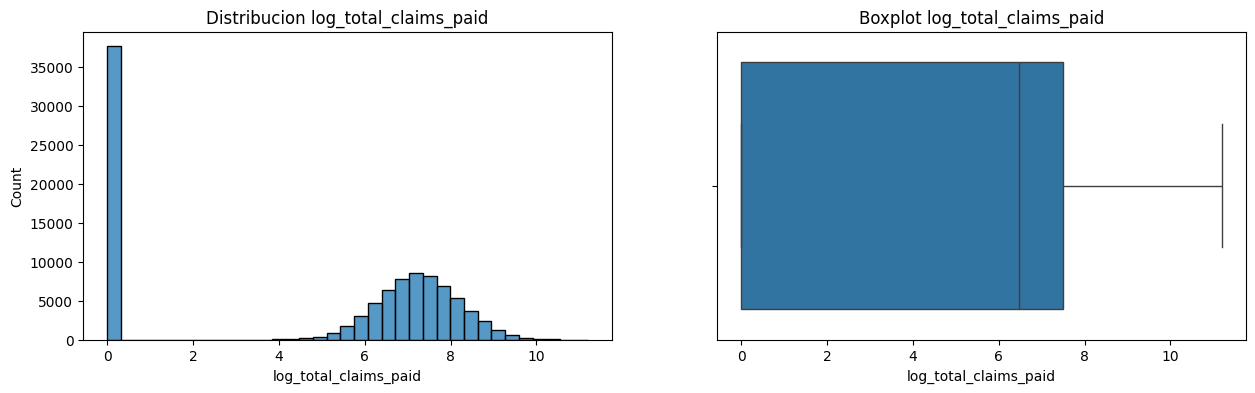

In [45]:
e = 'log_total_claims_paid'
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df[e], ax=ax[0])
ax[0].set_title(f"Distribucion {e}")
sns.boxplot(df[e], orient='y', ax=ax[1])
ax[1].set_title(f"Boxplot {e}")
plt.show()

In [46]:
df = df.drop(columns=['income','annual_medical_cost','annual_premium','avg_claim_amount','total_claims_paid'])

In [47]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'education',
       'marital_status', 'employment_status', 'household_size', 'dependents',
       'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'claims_count', 'chronic_count', 'hypertension', 'diabetes', 'asthma',
       'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure', 'log_income',
       'log_annual_medical_cost', 'log_annual_premium', 'log_avg_claim_amount',
       'log_total_claims_paid'],
     

## Regresión lineal

Realizaremos una regresión lineal sobre el `annual_medical_cost`.

In [17]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,Never,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,Never,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,Never,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [40]:
X = df.drop(columns=["annual_medical_cost"])
y = df["annual_medical_cost"]

In [41]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [42]:
print(len(df), "filas |", len(num_cols), "numéricas |", len(cat_cols), "categóricas")

100000 filas | 43 numéricas | 10 categóricas


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_cols),
], remainder="drop")


In [45]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)


In [46]:
candidatos = {
    "LinearRegression": {
        "est": LinearRegression(),
        "grid": [{}],  # sin hiperparámetros
    },
    "Ridge": {
        "est": Ridge(),
        "grid": [{"model__alpha": a} for a in np.logspace(-3, 2, 8)],  # 0.001..100
    },
    "Lasso": {
        "est": Lasso(max_iter=5000),
        "grid": [{"model__alpha": a} for a in np.logspace(-3, 1, 8)],  # 0.001..10
    },
    "ElasticNet": {
        "est": ElasticNet(max_iter=5000),
        "grid": [{"model__alpha": a, "model__l1_ratio": l1}
                 for a in np.logspace(-3, 1, 6)  # 6*3 = 18 combos
                 for l1 in (0.2, 0.5, 0.8)],
    },
}


In [48]:
def rmse(y_true, y_pred):
    # compatible con scikit-learn antiguo: no usa "squared="
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def mae(y_true, y_pred):
    return float(mean_absolute_error(y_true, y_pred))

def r2(y_true, y_pred):
    return float(r2_score(y_true, y_pred))

In [49]:
resultados = []
mejores = {}

for nombre, cfg in candidatos.items():
    best_rmse = np.inf
    best_params = None
    best_model = None

    for params in cfg["grid"]:
        pipe = Pipeline([
            ("prep", preprocess),
            ("model", cfg["est"])
        ])
        pipe.set_params(**params)
        pipe.fit(X_tr, y_tr)
        pred_val = pipe.predict(X_val)
        rmse_val = rmse(y_val, pred_val)
        if rmse_val < best_rmse:
            best_rmse = rmse_val
            best_params = params
            best_model = pipe

    mejores[nombre] = {"model": best_model, "rmse_val": best_rmse, "params": best_params}
    resultados.append({"model": nombre, "rmse_val": best_rmse, "params": best_params})

resumen = pd.DataFrame(resultados).sort_values("rmse_val")
resumen


d:\UDeusto\S1\Machine Learning\proyecto-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+09, tolerance: 5.647e+07

d:\UDeusto\S1\Machine Learning\proyecto-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.431e+10, tolerance: 5.647e+07

d:\UDeusto\S1\Machine Learning\proyecto-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

,model,rmse_val,params
2,Lasso,726.828629,{'model__alpha': 2.6826957952797246}
3,ElasticNet,726.881942,"{'model__alpha': 0.00630957344480193, 'model__..."
1,Ridge,726.908562,{'model__alpha': 100.0}
0,LinearRegression,726.971039,{}


In [51]:
mejor_nombre = resumen.iloc[0]["model"]
mejor_pipe = Pipeline([("prep", preprocess), ("model", candidatos[mejor_nombre]["est"])])
if mejores[mejor_nombre]["params"] is not None:
    mejor_pipe.set_params(**mejores[mejor_nombre]["params"])

# fit en TODO el train original (X_train, y_train)
mejor_pipe.fit(X_train, y_train)

y_pred = mejor_pipe.predict(X_test)
test_rmse = rmse(y_test, y_pred)
test_mae  = mae(y_test, y_pred)
test_r2   = r2(y_test, y_pred)

pd.DataFrame({"metric":["RMSE","MAE","R2"], "value":[test_rmse, test_mae, test_r2]})


,metric,value
0,RMSE,749.670313
1,MAE,453.520921
2,R2,0.942886


In [52]:
rng = np.random.RandomState(42)
B = 400
n = len(y_test)
y_t = np.array(y_test)
y_p = np.array(y_pred)

rmse_s, r2_s = [], []
for _ in range(B):
    idx = rng.randint(0, n, n)
    yt, yp = y_t[idx], y_p[idx]
    rmse_s.append(rmse(yt, yp))
    r2_s.append(r2(yt, yp) if np.var(yt) > 0 else np.nan)

pd.DataFrame({
    "metric": ["RMSE 95% CI", "R2 95% CI"],
    "low": [np.nanpercentile(rmse_s, 2.5), np.nanpercentile(r2_s, 2.5)],
    "high":[np.nanpercentile(rmse_s,97.5), np.nanpercentile(r2_s,97.5)]
})


,metric,low,high
0,RMSE 95% CI,727.112664,771.565775
1,R2 95% CI,0.939539,0.946006


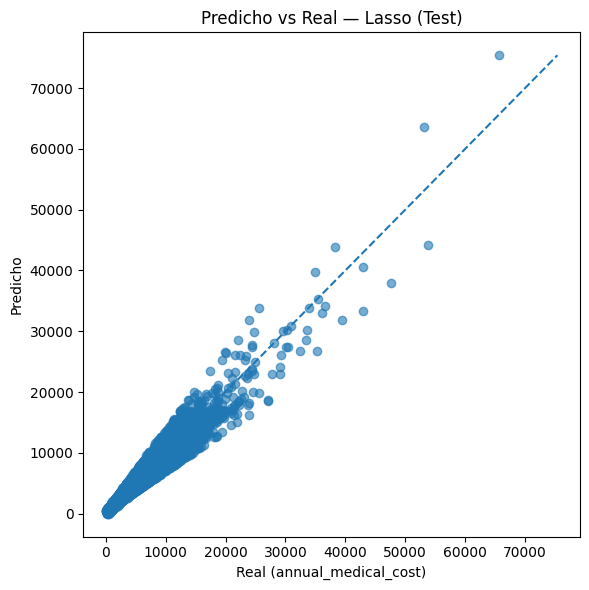

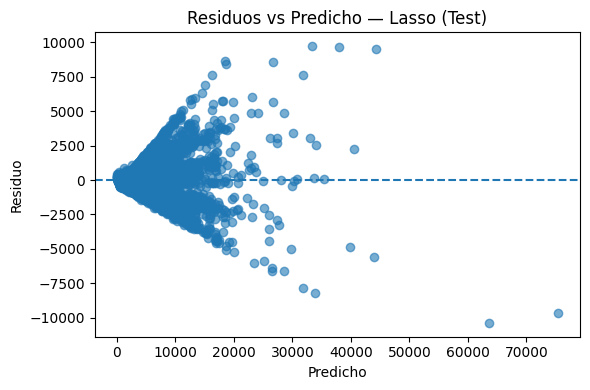

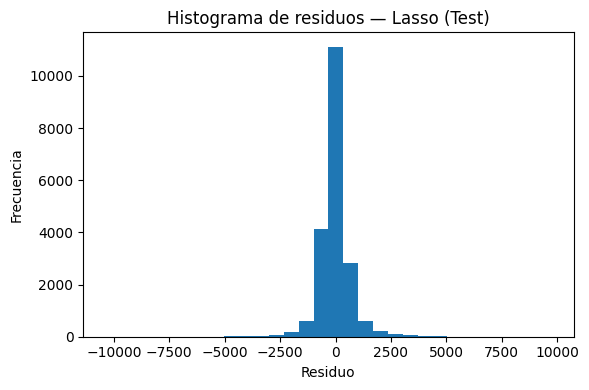

In [53]:
# Predicho vs Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
a, b = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([a,b],[a,b], linestyle="--")
plt.xlabel("Real (annual_medical_cost)")
plt.ylabel("Predicho")
plt.title(f"Predicho vs Real — {mejor_nombre} (Test)")
plt.tight_layout(); plt.show()

# Residuos
res = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, res, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicho"); plt.ylabel("Residuo")
plt.title(f"Residuos vs Predicho — {mejor_nombre} (Test)")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.hist(res, bins=30)
plt.xlabel("Residuo"); plt.ylabel("Frecuencia")
plt.title(f"Histograma de residuos — {mejor_nombre} (Test)")
plt.tight_layout(); plt.show()


## Clasificación

## No supervisado

### PCA

### Clustering